In [ ]:
# ELEC6604 Assignment 5 startup demo python file

In [ ]:
# PART 1: 
# CONNECT WITH YOUR DRIVE
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# LOAD IN THE LIBRARIES
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# keras imports for the dataset and building our neural network
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils
import os

from keras.datasets import mnist
from keras import backend as K
import cv2
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import SelectKBest, f_classif
import random
from math import isnan

from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score 
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
print(os.listdir('./drive/MyDrive'))
train = pd.read_csv('./drive/MyDrive/neural network/Train.csv')
val = pd.read_csv('./drive/MyDrive/neural network/Validate.csv')
test = pd.read_csv('./drive/MyDrive/neural network/Test.csv')
print(train.columns)
print(val.shape)

['neural network', 'Assignment3_partA.ipynb（副本）', 'binary-classifier-using-keras-97-98-accuracy.ipynb', 'Untitled0.ipynb', 'CKD', 'video_dataset', 'CV_LiuChengjie.pdf']
Index(['ID', 'Married', 'Gender', 'Age', 'Graduate', 'Profession',
       'Years_of_Working ', 'Spending_Score', 'Family_Members', 'Category',
       'Class(Target)'],
      dtype='object')
(1069, 11)


In [ ]:
#Codifica di stringhe

le = preprocessing.LabelEncoder()

le = le.fit(train['Profession'])
train['Profession'] = le.transform(train['Profession'])
le = le.fit(val['Profession'])
val['Profession'] = le.transform(val['Profession'])
le = le.fit(test['Profession'])
test['Profession'] = le.transform(test['Profession'])


le = le.fit(train['Spending_Score'])
train['Spending_Score'] = le.transform(train['Spending_Score'])
le = le.fit(val['Spending_Score'])
val['Spending_Score'] = le.transform(val['Spending_Score'])
le = le.fit(test['Spending_Score'])
test['Spending_Score'] = le.transform(test['Spending_Score'])


le = le.fit(train['Category'])
train['Category'] = le.transform(train['Category'])
le = le.fit(val['Category'])
val['Category'] = le.transform(val['Category'])
le = le.fit(test['Category'])
test['Category'] = le.transform(test['Category'])

# le = le.fit(train['Class(Target)'])
# train['Class(Target)'] = le.transform(train['Class(Target)'])
# le = le.fit(val['Class(Target)'])
# val['Class(Target)'] = le.transform(val['Class(Target)'])
# le = le.fit(test['Class(Target)'])
# test['Class(Target)'] = le.transform(test['Class(Target)'])




In [ ]:

# train = train.dropna()
# val = val.dropna()
#replace the missing value
train['Gender'] = train['Gender'].fillna(random.randint(0,1))
val['Gender'] = val['Gender'].fillna(random.randint(0,1))
test['Gender'] = test['Gender'].fillna(random.randint(0,1))

train['Graduate'] = train['Graduate'].fillna(random.randint(0,1))
val['Graduate'] = val['Graduate'].fillna(random.randint(0,1))
test['Graduate'] = test['Graduate'].fillna(random.randint(0,1))

train['Profession'] = train['Profession'].fillna(random.randint(0,8))
val['Profession'] = val['Profession'].fillna(random.randint(0,8))
test['Profession'] = test['Profession'].fillna(random.randint(0,8))

train['Category'] = train['Category'].fillna(random.randint(0,1))
val['Category'] = val['Category'].fillna(random.randint(0,1))
test['Category'] = test['Category'].fillna(random.randint(0,1))

train['Years_of_Working '] = train['Years_of_Working '].fillna(int(train.mean()['Years_of_Working ']))
val['Years_of_Working '] = val['Years_of_Working '].fillna(int(val.mean()['Years_of_Working ']))
test['Years_of_Working '] = test['Years_of_Working '].fillna(int(test.mean()['Years_of_Working ']))

train['Family_Members'] = train['Family_Members'].fillna(int(train.mean()['Family_Members']))
val['Family_Members'] = val['Family_Members'].fillna(int(val.mean()['Family_Members']))
test['Family_Members'] = test['Family_Members'].fillna(int(test.mean()['Family_Members']))

#字符串编码
x_train = train[['ID', 'Married', 'Gender', 'Age', 'Graduate', 'Profession',
       'Years_of_Working ', 'Spending_Score', 'Family_Members', 'Category']]

y_train = train[['Class(Target)']]
y_train = y_train.replace('A',0)
y_train = y_train.replace('B',1)
y_train = y_train.replace('C',2)
y_train = y_train.replace('D',3)
print(x_train.shape)
print(y_train.shape)


x_val = val[['ID', 'Married', 'Gender', 'Age', 'Graduate', 'Profession',
       'Years_of_Working ', 'Spending_Score', 'Family_Members', 'Category']]
y_val = val[['Class(Target)']]
y_val = y_val.replace('A',0)
y_val = y_val.replace('B',1)
y_val = y_val.replace('C',2)
y_val = y_val.replace('D',3)
print(x_val.shape)
print(y_val.shape)

x_test = test[['ID', 'Married', 'Gender', 'Age', 'Graduate', 'Profession',
       'Years_of_Working ', 'Spending_Score', 'Family_Members', 'Category']]
print(x_test.shape)


x_train = x_train.astype('float32')
x_val = x_val.astype('float32')
x_test = x_test.astype('float32')

#normalization
x_train = (x_train - x_train.mean())/(x_train.std())
x_val = (x_val - x_val.mean())/(x_val.std())
x_test = (x_test - x_test.mean())/(x_test.std())

(7487, 10)
(7487, 1)
(1069, 10)
(1069, 1)
(2139, 10)


<ipython-input-9-ec3facd88e01>:20: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  train['Years_of_Working '] = train['Years_of_Working '].fillna(int(train.mean()['Years_of_Working ']))
<ipython-input-9-ec3facd88e01>:21: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  val['Years_of_Working '] = val['Years_of_Working '].fillna(int(val.mean()['Years_of_Working ']))
<ipython-input-9-ec3facd88e01>:24: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In additio

In [ ]:
n_classes = 4
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_val = np_utils.to_categorical(y_val, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (7487, 1)
Shape after one-hot encoding:  (7487, 4)


In [ ]:
for i in x_train.columns:
    # print(df[i].values) 
    for k in range(len( x_train[i].values)):
        if isnan(x_train[i].values[k]):
            print('字段%s存在NaN值:' % i + '索引位置是：%s'%k)

In [ ]:
#feature selection
# Perform feature selection using SelectKBest and f_classif
selector = SelectKBest(f_classif, k=6)
X_train_selected = selector.fit_transform(x_train, y_train)
X_val_selected = selector.transform(x_val)
X_test_selected = selector.transform(x_test)
print(X_train_selected.shape)
print(X_val_selected.shape)
selected_features = selector.get_support(indices=True)


scores = selector.scores_[selected_features]
# feature_names = load_digits().feature_names[selected_features]
for i, (score, name) in enumerate(zip(scores, selected_features)):
    print(f"Feature {i+1}: {name} (score = {score:.2f})")

(7487, 6)
(1069, 6)
Feature 1: 2 (score = 358.94)
Feature 2: 3 (score = 345.36)
Feature 3: 4 (score = 256.82)
Feature 4: 5 (score = 234.66)
Feature 5: 7 (score = 363.25)
Feature 6: 8 (score = 63.74)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Epoch 1/100
38/38 - 1s - loss: 1.3779 - accuracy: 0.2980 - val_loss: 1.3755 - val_accuracy: 0.2544 - 1s/epoch - 34ms/step
Epoch 2/100
38/38 - 0s - loss: 1.3419 - accuracy: 0.3542 - val_loss: 1.3191 - val_accuracy: 0.3527 - 121ms/epoch - 3ms/step
Epoch 3/100
38/38 - 0s - loss: 1.2684 - accuracy: 0.4290 - val_loss: 1.2565 - val_accuracy: 0.4341 - 133ms/epoch - 3ms/step
Epoch 4/100
38/38 - 0s - loss: 1.2364 - accuracy: 0.4442 - val_loss: 1.2479 - val_accuracy: 0.4378 - 122ms/epoch - 3ms/step
Epoch 5/100
38/38 - 0s - loss: 1.2281 - accuracy: 0.4485 - val_loss: 1.2374 - val_accuracy: 0.4443 - 137ms/epoch - 4ms/step
Epoch 6/100
38/38 - 0s - loss: 1.2257 - accuracy: 0.4494 - val_loss: 1.2348 - val_accuracy: 0.4443 - 129ms/epoch - 3ms/step
Epoch 7/100
38/38 - 0s - loss: 1.2214 - accuracy: 0.4529 - val_loss: 1.2410 - val_accuracy: 0.4537 - 127ms/epoch - 3ms/step
Epoch 8/100
38/38 - 0s - loss: 1.2195 - accuracy: 0.4524 - val_loss: 1.2361 - val_accuracy: 0.4415 - 120ms/epoch - 3ms/step
Epoch 9/10

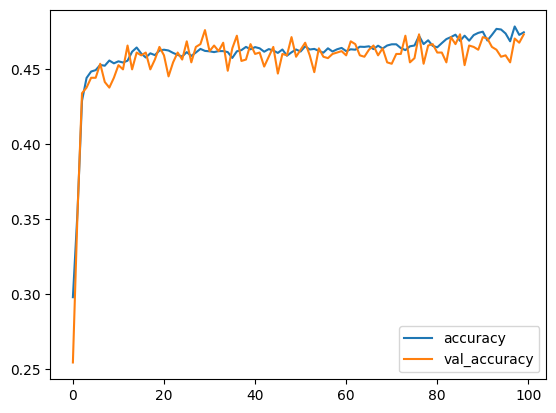

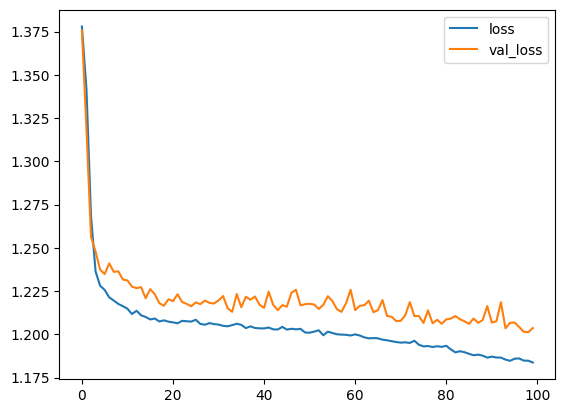

In [ ]:
num_hidden_nodes = 200
num_hidden_nodes2 = 100
num_classes = 4
num_features = 6
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(num_hidden_nodes, input_dim=num_features, kernel_initializer='normal', activation='sigmoid'))
    model.add(Dense(num_hidden_nodes2, kernel_initializer='normal', activation='sigmoid'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    # Choice of optimizer: adam (adaptive moment estimation), AdaGrad (adaptive learning rate), 
    # sgd (Stochastic gradient descent), RMSprop (similar to AdaGrad), Adadelta (adaptive delta) ...
    return model
# build the model
model = baseline_model()
# Fit the model
# verbose : number of steps before showing a result
history = model.fit(X_train_selected, Y_train, validation_data=(X_val_selected, Y_val), epochs=100, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_val_selected, Y_val, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))
#
metrics = history.history
plt.plot(history.epoch, metrics['accuracy'], metrics['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.show()

plt.plot(history.epoch, metrics['loss'], metrics['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()

34/34 [==============================] - 0s 1ms/step
recall_score=0.473340
f1_score=0.473340
precision_score=0.473340
confusion_matrix:


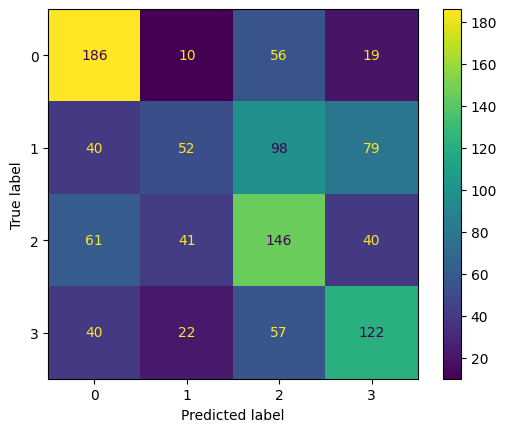

In [ ]:
y_pred = model.predict(X_val_selected)

y_pred_n = y_pred.argmax(axis=1)
cm = confusion_matrix(y_val, y_pred_n)

cm_display = ConfusionMatrixDisplay(cm).plot()

rc_score = recall_score(y_val, y_pred_n, average='micro')
f1score = f1_score(y_val, y_pred_n, average='micro')
prec_score = precision_score(y_val, y_pred_n, average='micro')
print("recall_score=%f"%(rc_score))
print("f1_score=%f"%(f1score))
print("precision_score=%f"%(prec_score))
print("confusion_matrix:")

In [ ]:
y_pred = model.predict(X_test_selected)

y_pred_n = y_pred.argmax(axis=1)

print(y_pred)
print(y_pred_n)


y_pre = pd.DataFrame(y_pred_n, columns = ['Class(Target)'])
y_pre = y_pre.replace(0,'A')
y_pre = y_pre.replace(1,'B')
y_pre = y_pre.replace(2,'C')
y_pre = y_pre.replace(3,'D')
print(y_pre)
y_pre.to_csv('./drive/MyDrive/neural network/Result3.csv')

67/67 [==============================] - 0s 1ms/step
[[0.6508989  0.10185289 0.1370881  0.1101601 ]
 [0.6282905  0.08999249 0.18761252 0.09410456]
 [0.25855684 0.23928991 0.3115083  0.19064492]
 ...
 [0.70537627 0.0949111  0.09539946 0.10431319]
 [0.6427098  0.08924828 0.17280097 0.09524092]
 [0.17316934 0.26480323 0.5050521  0.05697528]]
[0 0 2 ... 0 0 2]
     Class(Target)
0                A
1                A
2                C
3                B
4                A
...            ...
2134             A
2135             A
2136             A
2137             A
2138             C

[2139 rows x 1 columns]


In [ ]:
y_pred = model.predict(X_val_selected)

y_pred_n = y_pred.argmax(axis=1)

print(y_pred)
print(y_pred_n)


y_pre = pd.DataFrame(y_pred_n, columns = ['Class(Target)'])
y_pre = y_pre.replace(0,'A')
y_pre = y_pre.replace(1,'B')
y_pre = y_pre.replace(2,'C')
y_pre = y_pre.replace(3,'D')
print(y_pre)
y_pre.to_csv('./drive/MyDrive/neural network/Result_val.csv')

34/34 [==============================] - 0s 3ms/step
[[0.15549807 0.27809417 0.42257807 0.1438297 ]
 [0.2725807  0.20402509 0.37150088 0.15189332]
 [0.05697916 0.309823   0.14944164 0.48375618]
 ...
 [0.730538   0.08178275 0.09932043 0.08835884]
 [0.07799551 0.2986867  0.19416474 0.429153  ]
 [0.4024756  0.10615605 0.43575373 0.05561467]]
[2 2 3 ... 0 3 2]
     Class(Target)
0                C
1                C
2                D
3                A
4                A
...            ...
1064             A
1065             C
1066             A
1067             D
1068             C

[1069 rows x 1 columns]
